In [1]:
from IPython.display import display, Image
print("슝=3")

슝=3


In [2]:
import pandas as pd
print("슝=3")

슝=3


In [3]:
!mkdir -p ~/work/bike_regression
!wget https://d3s0tskafalll9.cloudfront.net/media/documents/macbook_data.zip
!unzip -o macbook_data.zip -d ~/work/bike_regression/

--2026-01-22 06:01:22--  https://d3s0tskafalll9.cloudfront.net/media/documents/macbook_data.zip
Resolving d3s0tskafalll9.cloudfront.net (d3s0tskafalll9.cloudfront.net)... 3.169.137.128, 3.169.137.123, 3.169.137.85, ...
Connecting to d3s0tskafalll9.cloudfront.net (d3s0tskafalll9.cloudfront.net)|3.169.137.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 204596 (200K) [application/zip]
Saving to: ‘macbook_data.zip’

macbook_data.zip    100%[===================>] 199.80K  --.-KB/s    in 0.01s   

2026-01-22 06:01:22 (16.5 MB/s) - ‘macbook_data.zip’ saved [204596/204596]

Archive:  macbook_data.zip
  inflating: /home/jovyan/work/bike_regression/data/macbook.csv  
  inflating: /home/jovyan/work/bike_regression/data/macbook_test.csv  
  inflating: /home/jovyan/work/bike_regression/data/multi_macbook.csv  
  inflating: /home/jovyan/work/bike_regression/data/multi_macbook_test.csv  


In [4]:
import os

data_path = os.path.join(os.getenv('HOME'), 'work/bike_regression/data/macbook.csv')
macbook = pd.read_csv(data_path)
print(macbook.shape)
macbook.head()

(80, 2)


,used_years,price
0,2.65,175
1,3.80,63
2,0.95,273
3,4.50,133
4,4.45,106


In [5]:
import matplotlib.pyplot as plt
# 실행한 브라우저에서 바로 그림을 볼 수 있게 해줌
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.
print("슝=3")

슝=3


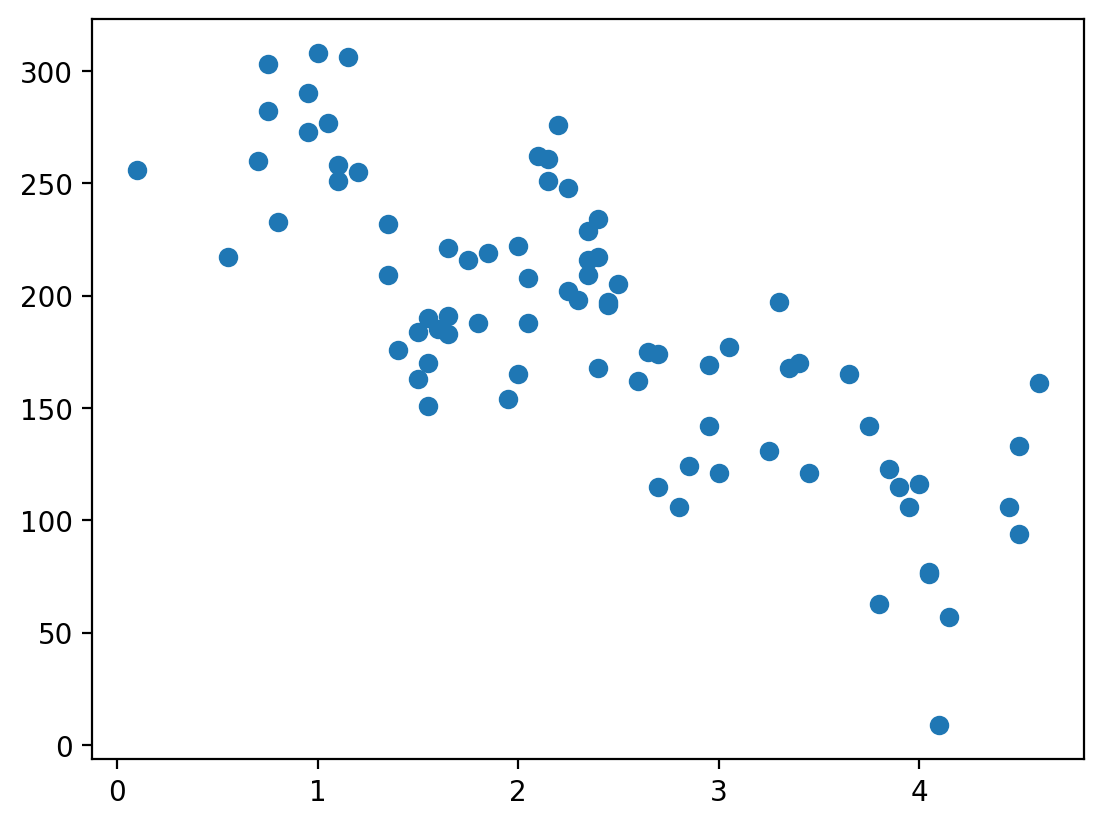

In [6]:
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

- plt.scatter(x, y) 함수에서 인자의 순서는 항상 첫 번째가 x축, 두 번째가 y축을 의미
- 사용년도가 증가하면 가격은 하락
- 사용연수가 높아질수록 중고가격은 낮아지는 경향이 있으므로 음의 상관관계가 있습니다.
  

In [7]:
import numpy as np

# np.corrcoef(x, y)를 사용합니다.
np.corrcoef(macbook['used_years'], macbook['price'])

array([[ 1.        , -0.78972238],
       [-0.78972238,  1.        ]])

| | used_years (x) | price (y) |
| :--- | :---: | :---: |
| **used_years (x)** | **1.0** | -0.7897 |
| **price (y)** | -0.7897 | **1.0** |

- 대각선에 해당하는 (0, 0) 위치와 (1, 1)은 자신의 상관계수
- (0, 1)과 (1, 0) 위치에는 첫 번째 변수와 두 번째 변수 간의 상관계수

## 모델(model)이란?
'모델(model)' 이라는 용어를 사용하였는데, 모델은 '특정 정보를 입력받아서 그 정보에 따라 원하는 값을 예측하여 값을 출력하는 함수'로 이해할 수 있습니다.

In [8]:
x = macbook["used_years"].values
y = macbook["price"].values
print("슝=3")

슝=3


In [9]:
# 기울기를 w, y절편을 b
def model(x, w, b):
    y = w * x + b
    return y
print("슝=3")

슝=3


In [10]:
# y=2x+1, x=5
model(x=5, w=2, b=1)

11

## 모델 학습이란?
모델을 "학습", 혹은 "훈련(training)\
먼저, 모델을 학습시킨다는 것은 모델이 입력을 받았을 때 정답값에 가까운 출력을 낼 수 있는 최적의 "매개변수", 혹은 "파라미터" 를 찾는다는 뜻

정말 쉽게 이야기하자면, 우리가 하려는 작업은 **방정식을 푸는 것** 과 일맥상통합니다. 다음과 같은 두 가지 데이터를 예로 들어보겠습니다.

* **데이터 1:** 사용 연수 2년인 맥북의 중고가 $\rightarrow$ **100만 원**
* **데이터 2:** 사용 연수 5년인 맥북의 중고가 $\rightarrow$ **40만 원**

만약 세상의 모든 맥북 중고가가 특정 일차함수에 따라 정확히 결정된다고 가정하면, 우리는 다음과 같은 연립방정식을 세워 풀 수 있습니다.

#### 1. 구하고자 하는 방정식 정의
우리가 찾고자 하는 직선의 형태를 다음과 같이 설정합니다.
$$y = wx + b$$

#### 2. 데이터 대입을 통한 연립방정식 수립
주어진 데이터를 대입하면 두 개의 식을 얻을 수 있습니다.

* **데이터 1:** $100 = w \times 2 + b$
* **데이터 2:** $40 = w \times 5 + b$

이를 연립방정식으로 묶으면 다음과 같습니다.

$$
\begin{cases} 
100 = 2w + b \\ 
40 = 5w + b 
\end{cases}
$$

#### 3. 방정식 풀이 결과
간단한 연립방정식 풀이를 통해 다음과 같은 값을 얻을 수 있습니다.

* **기울기($w$):** $-20$
* **절편($b$):** $140$

즉, 최종 방정식은 **$y = -20x + 140$** 이 됩니다.


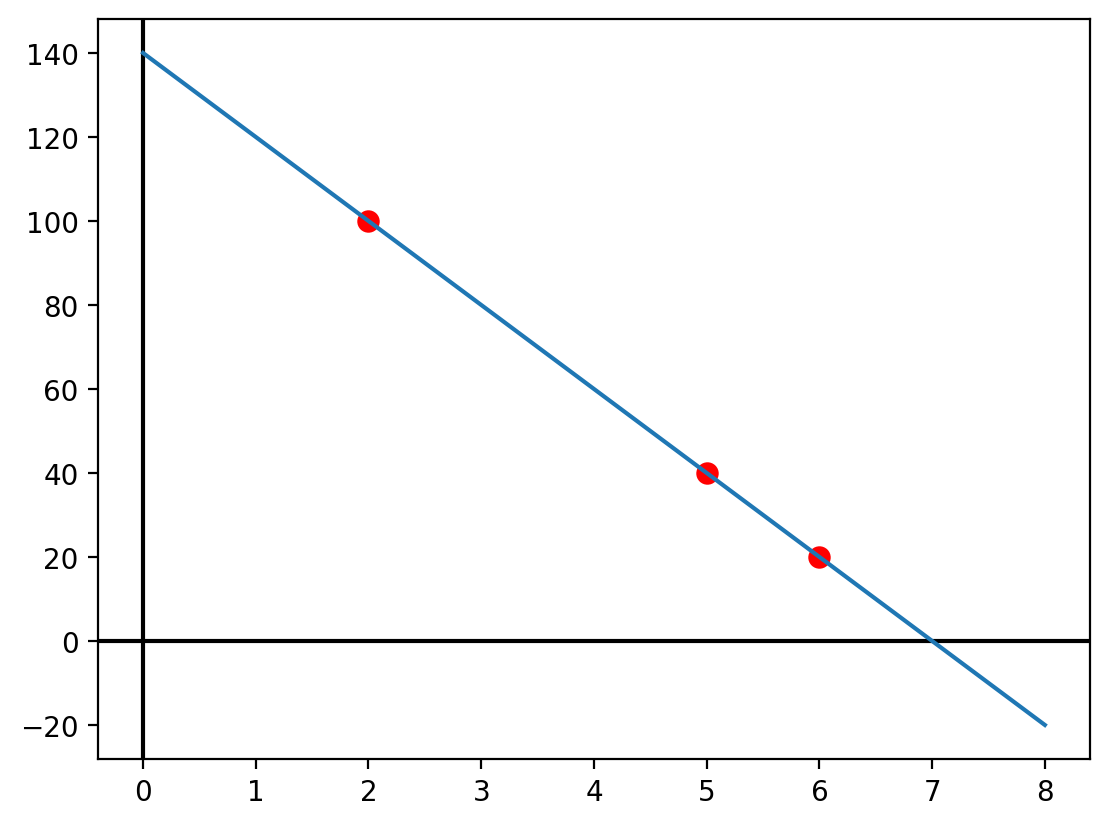

In [11]:
# x축, y축 그리기
plt.axvline(x=0, c='black')
plt.axhline(y=0, c='black')

# y = wx + b 일차함수 그리기
x = np.linspace(0, 8, 9)

# NumPy(넘파이)의 가장 강력한 특징인 '벡터화(Vectorization)' 모든 요소에 동시에 연산적용
y = model(x, w=-20, b=140) # y = -20x + 140
plt.plot(y)


# 나의 (x, y) 점 찍기
x_data = [2, 5, 6]
y_data = [100, 40, 20]
plt.scatter(x_data, y_data, c='r', s=50)

plt.show()

In [12]:
clean_data = [(int(year), int(price)) for year, price in zip(x, y)]
print(clean_data)

[(0, 140), (1, 120), (2, 100), (3, 80), (4, 60), (5, 40), (6, 20), (7, 0), (8, -20)]


### 🎯 머신러닝의 목표: 최적의 파라미터 찾기
데이터 분석의 궁극적인 목표는 단순히 데이터를 그래프에 점으로 찍는 것에 그치지 않고, 그 데이터들을 가장 잘 설명하는 **'규칙(함수)'**을 찾아내는 것입니다.

#### 1. 최소 오차의 원칙
현실의 데이터는 완벽한 직선 위에 있지 않습니다. 따라서 우리는 모든 데이터를 100% 맞추려 하기보다, 전체적인 **오차(Error)를 최소화**할 수 있는 가장 '그럴듯한' 함수를 찾아야 합니다.



#### 2. 예측 모델: 일차함수
우리가 찾는 가장 기본적인 모델의 형태는 다음과 같습니다.
$$y = wx + b$$

* **$y$**: 예측하려는 값 (예: 맥북 가격)
* **$x$**: 입력 데이터 (예: 사용 연수)

#### 3. 핵심 용어 정리 (꼭 기억하세요!)
데이터를 학습하며 우리가 최적의 값을 찾아내야 하는 $w$와 $b$는 다음과 같이 불립니다.

| 용어 | 설명 |
| :--- | :--- |
| **매개변수 (Parameter)** | 모델 내부에서 결정되는 값으로, 데이터를 통해 학습됩니다. |
| **가중치 (Weight, $w$)** | $x$가 $y$에 주는 영향력을 조절하는 값 (기울기) |
| **편향 (Bias / Intercept, $b$)** | $x$가 0일 때의 기본값 (y절편) |

#### 4. 학습(Training)의 의미
머신러닝에서 **학습한다**는 것은 모델이 수많은 데이터를 반복해서 보면서, 오차가 가장 적어지는 지점의 **$w$와 $b$ 값을 계속해서 업데이트(수정)해 나가는 과정**을 의미합니다.

In [13]:
w = 3.1
b = 2.3
print("슝=3")

슝=3


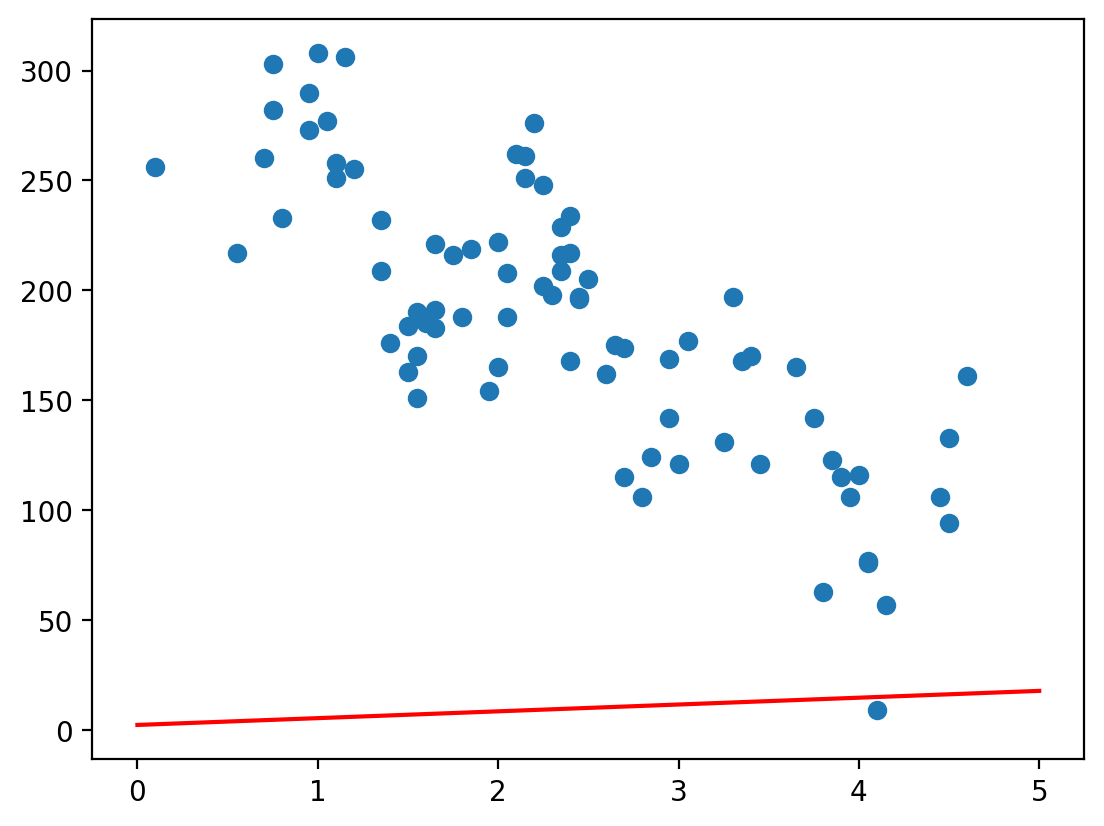

In [14]:
x = np.linspace(0, 5, 6)
y = model(x, w, b) # y = 3.1x + 2.3
plt.plot(y, c='r')

plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

In [15]:
x = macbook["used_years"].values
x

array([2.65, 3.8 , 0.95, 4.5 , 4.45, 2.7 , 3.05, 2.25, 2.3 , 1.85, 1.5 ,
       0.95, 2.6 , 0.55, 2.05, 0.75, 3.95, 2.8 , 2.05, 1.15, 1.35, 3.35,
       1.35, 2.45, 2.4 , 0.1 , 3.45, 2.35, 0.7 , 1.05, 1.75, 4.1 , 4.5 ,
       4.  , 2.  , 2.45, 2.5 , 2.1 , 3.  , 4.05, 2.7 , 2.15, 3.3 , 2.4 ,
       2.85, 1.65, 1.55, 2.15, 3.4 , 1.55, 0.8 , 2.95, 2.4 , 1.4 , 1.65,
       2.25, 3.85, 3.9 , 4.6 , 2.35, 4.05, 1.2 , 1.95, 1.6 , 2.  , 1.8 ,
       3.75, 3.65, 2.35, 2.2 , 1.  , 4.15, 1.1 , 1.55, 2.95, 1.5 , 1.65,
       1.1 , 3.25, 0.75])

In [16]:
prediction = model(x, w, b) # 현재 w = 3.1, b = 2.3
prediction

array([10.515, 14.08 ,  5.245, 16.25 , 16.095, 10.67 , 11.755,  9.275,
        9.43 ,  8.035,  6.95 ,  5.245, 10.36 ,  4.005,  8.655,  4.625,
       14.545, 10.98 ,  8.655,  5.865,  6.485, 12.685,  6.485,  9.895,
        9.74 ,  2.61 , 12.995,  9.585,  4.47 ,  5.555,  7.725, 15.01 ,
       16.25 , 14.7  ,  8.5  ,  9.895, 10.05 ,  8.81 , 11.6  , 14.855,
       10.67 ,  8.965, 12.53 ,  9.74 , 11.135,  7.415,  7.105,  8.965,
       12.84 ,  7.105,  4.78 , 11.445,  9.74 ,  6.64 ,  7.415,  9.275,
       14.235, 14.39 , 16.56 ,  9.585, 14.855,  6.02 ,  8.345,  7.26 ,
        8.5  ,  7.88 , 13.925, 13.615,  9.585,  9.12 ,  5.4  , 15.165,
        5.71 ,  7.105, 11.445,  6.95 ,  7.415,  5.71 , 12.375,  4.625])

In [17]:
macbook['prediction'] = prediction
macbook.head()

,used_years,price,prediction
0,2.65,175,10.515
1,3.80,63,14.080
2,0.95,273,5.245
3,4.50,133,16.250
4,4.45,106,16.095


In [18]:
macbook['error'] = macbook['price'] - macbook['prediction']
macbook.head()

,used_years,price,prediction,error
0,2.65,175,10.515,164.485
1,3.80,63,14.080,48.920
2,0.95,273,5.245,267.755
3,4.50,133,16.250,116.750
4,4.45,106,16.095,89.905


Error = 정답과 예측값의 차이

In [19]:
def RMSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    rmse = mse ** 0.5        # MSE의 제곱근
    return rmse
print("슝=3")

슝=3


In [20]:
x = macbook["used_years"].values
y = macbook["price"].values

predictions = model(x, w, b)
print(predictions)

[10.515 14.08   5.245 16.25  16.095 10.67  11.755  9.275  9.43   8.035
  6.95   5.245 10.36   4.005  8.655  4.625 14.545 10.98   8.655  5.865
  6.485 12.685  6.485  9.895  9.74   2.61  12.995  9.585  4.47   5.555
  7.725 15.01  16.25  14.7    8.5    9.895 10.05   8.81  11.6   14.855
 10.67   8.965 12.53   9.74  11.135  7.415  7.105  8.965 12.84   7.105
  4.78  11.445  9.74   6.64   7.415  9.275 14.235 14.39  16.56   9.585
 14.855  6.02   8.345  7.26   8.5    7.88  13.925 13.615  9.585  9.12
  5.4   15.165  5.71   7.105 11.445  6.95   7.415  5.71  12.375  4.625]


In [21]:
rmse = RMSE(predictions, y)
rmse

np.float64(188.81322969819274)

In [22]:
def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = RMSE(predictions, y)
    return L
print("슝=3")

슝=3


- 손실함수는 "모델이 예측하는 출력값과 정답값 간의 거리를 나타내는 함수
- x, w, b, y 중 x와 y는 주어진 데이터로 우리가 수정할 수 없는 값이다.
- 다만, w와 b는 우리가 수정할 수 있다. 이렇게 수정할 수 있는 변수를 "파라미터", 혹은 "가중치"라고 한다.

In [23]:
def gradient(x, w, b, y):
    dw = (loss(x, w + 0.0001, b, y) - loss(x, w, b, y)) / 0.0001
    db = (loss(x, w, b + 0.0001, y) - loss(x, w, b, y)) / 0.0001
    return dw, db
print("슝=3")

슝=3



#### 가중치 구하는 공식
w′= w−ηg
- w′: 새로운 w
- w : 현재 w
- η : 얼마나 업데이트를 할 지를 결정하는 상수 (학습률)
- g : 기울기, 또는 그래디언트


#### 1. 가중치($w$)에 대한 미분 (dw)
가중치 $w$가 아주 미세하게 변할 때 손실 함수($L$)가 얼마나 변하는지를 나타냅니다.
$$\frac{\partial L}{\partial w} \approx \frac{Loss(w + h, b) - Loss(w, b)}{h}$$

#### 2. 편향($b$)에 대한 미분 (db)
편향 $b$가 아주 미세하게 변할 때 손실 함수($L$)가 얼마나 변하는지를 나타냅니다.
$$\frac{\partial L}{\partial b} \approx \frac{Loss(w, b + h) - Loss(w, b)}{h}$$


* **$L$ (Loss)**: 실제 값과 예측 값의 차이를 나타내는 손실 함수입니다.
* **$h$**: 아주 작은 수(0.0001)로, 미분의 정의인 $\lim_{h \to 0}$을 컴퓨터로 구현하기 위한 값입니다.

In [24]:
LEARNING_RATE = 1 # η
print("슝=3")

슝=3


### 🔄 경사하강법(Gradient Descent)을 이용한 모델 학습 단계

머신러닝 모델이 데이터를 학습하는 전체 과정은 다음과 같은 순서로 진행됩니다.

#### 1. 데이터 준비
* 입력 데이터($x$)와 정답 데이터($y$)를 준비합니다. 
* 예: 맥북 사용 연수($x$)와 실제 중고 가격($y$)

#### 2. 파라미터 초기화
* 가중치($w$)와 편향($b$)을 랜덤한 값이나 특정 초깃값으로 설정합니다.

#### 3. 예측 및 손실 계산 (Forward Pass)
* 현재의 $w$와 $b$를 사용하여 모델의 예측값($prediction$)을 구합니다.
* 예측값과 실제 정답($y$)을 비교하여 **손실 함수(Loss Function)** 값을 계산합니다.

#### 4. 기울기 계산 (Gradient Calculation)
* 손실 함수를 최소화하기 위해 현재 위치에서의 **기울기(Gradient)** 를 계산합니다. ($dw$, $db$)

#### 5. 파라미터 업데이트 (Update)
* 계산된 기울기에 **학습률($\eta$, Learning Rate)** 을 곱하여 기존의 $w$와 $b$를 업데이트합니다.
* **$w$ 업데이트:** $w' = w - \eta \cdot dw$
* **$b$ 업데이트:** $b' = b - \eta \cdot db$

#### 6. 반복 학습 (Iteration)
* 손실 함수가 충분히 줄어들어 최적의 $w, b$를 찾을 때까지 **3~5번 과정을 반복**합니다. 
* 이 반복 횟수를 보통 **에포크(Epoch)**라고 부릅니다.

In [25]:
x = macbook["used_years"].values
y = macbook["price"].values
print("슝=3")

슝=3


In [26]:
w = 3.1
b = 2.3
w, b

(3.1, 2.3)

In [27]:
losses = []
print("슝=3")

슝=3


In [28]:
%%time
for i in range(1, 2001):
    dw, db = gradient(x, w, b, y)   # 3, 4번: 모델이 prediction을 예측하고, 손실함수값을 계산함과 동시에 기울기 계산
    w -= LEARNING_RATE * dw         # 5번: w = w - η * dw 로 업데이트
    b -= LEARNING_RATE * db         # 5번: b = b - η * db 로 업데이트
    L = loss(x, w, b, y)            # 현재의 loss 값 계산
    losses.append(L)                # loss 값 기록
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 108.0080
Iteration 200 : Loss 94.5709
Iteration 300 : Loss 81.8560
Iteration 400 : Loss 70.1799
Iteration 500 : Loss 59.9778
Iteration 600 : Loss 51.7475
Iteration 700 : Loss 45.8356
Iteration 800 : Loss 42.1474
Iteration 900 : Loss 40.1357
Iteration 1000 : Loss 39.1420
Iteration 1100 : Loss 38.6793
Iteration 1200 : Loss 38.4703
Iteration 1300 : Loss 38.3772
Iteration 1400 : Loss 38.3360
Iteration 1500 : Loss 38.3179
Iteration 1600 : Loss 38.3099
Iteration 1700 : Loss 38.3064
Iteration 1800 : Loss 38.3048
Iteration 1900 : Loss 38.3041
Iteration 2000 : Loss 38.3038
CPU times: user 130 ms, sys: 6.97 ms, total: 137 ms
Wall time: 142 ms


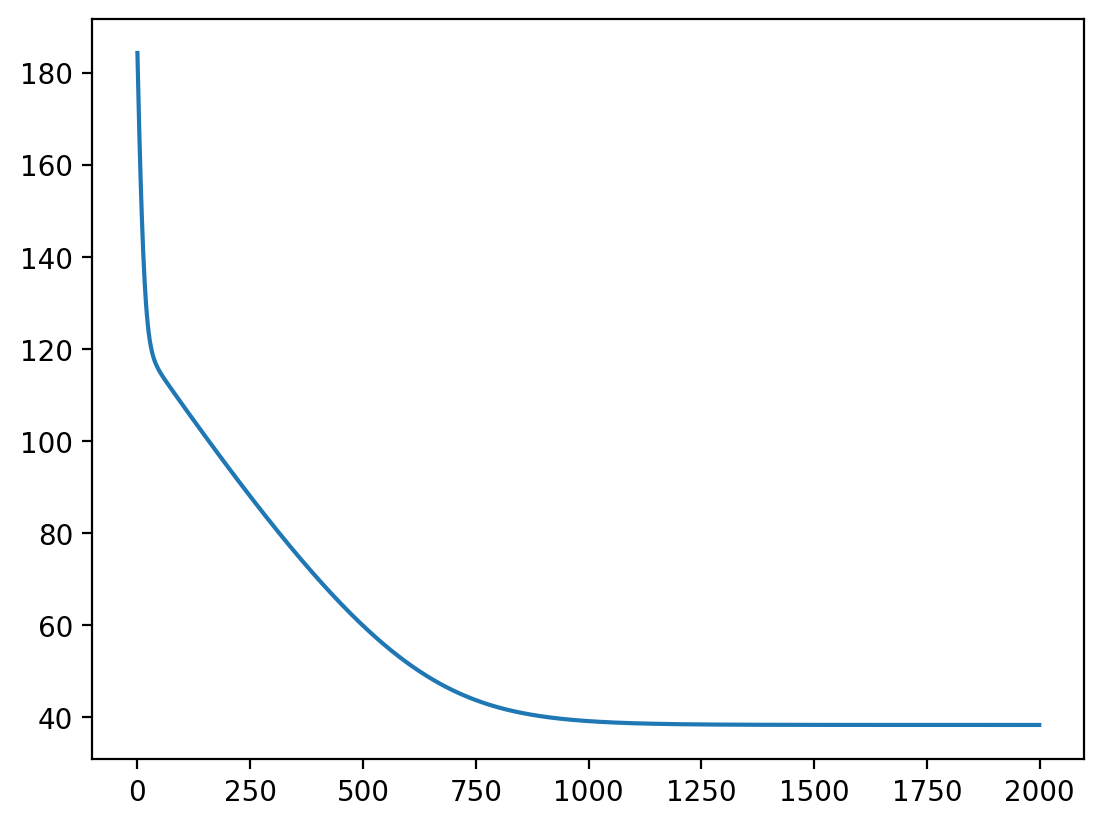

In [29]:
plt.plot(losses)
plt.show()

In [30]:
w, b

(np.float64(-44.92756090768412), np.float64(293.0815786721102))

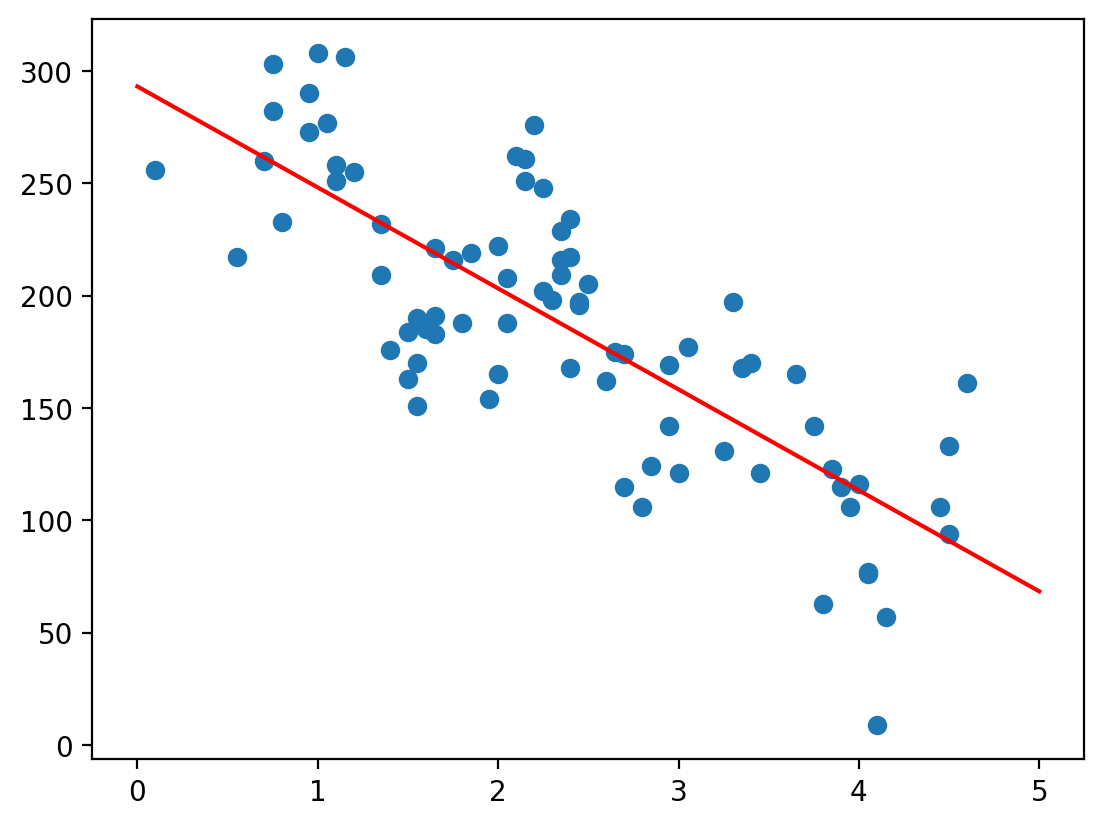

In [31]:
# 모델에 넣을 x 값들 준비
x = np.linspace(0, 5, 6)

# x, w, b를 모델에 넣어 y값 출력
y = model(x, w, b)

# 일차함수 y 그리기
plt.plot(y, c="r")


# 원본 데이터 점찍기
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

이제 Test Dat

In [32]:
test_path = os.path.join(os.getenv('HOME'), 
'work/bike_regression/data/macbook_test.csv')
test = pd.read_csv(test_path)
print(test.shape)
test.head()

(20, 2)


,used_years,price
0,1.20,203
1,1.85,206
2,2.40,191
3,2.85,164
4,3.05,176


In [33]:
test_x = test['used_years'].values
test_y = test['price'].values

In [34]:
prediction = model(test_x, w, b)
test['prediction'] = prediction
test

,used_years,price,prediction
0,1.20,203,239.168506
1,1.85,206,209.965591
2,2.40,191,185.255432
3,2.85,164,165.038030
4,3.05,176,156.052518
5,3.35,136,142.574250
6,2.55,133,178.516298
7,2.60,181,176.269920
8,2.50,181,180.762676
9,3.10,86,153.806140


In [35]:
test['error'] = test['price'] - test['prediction']
test

,used_years,price,prediction,error
0,1.20,203,239.168506,-36.168506
1,1.85,206,209.965591,-3.965591
2,2.40,191,185.255432,5.744568
3,2.85,164,165.038030,-1.038030
4,3.05,176,156.052518,19.947482
5,3.35,136,142.574250,-6.574250
6,2.55,133,178.516298,-45.516298
7,2.60,181,176.269920,4.730080
8,2.50,181,180.762676,0.237324
9,3.10,86,153.806140,-67.806140


In [36]:
rmse = ((test['error'] ** 2).sum() / len(test)) ** 0.5
rmse

np.float64(45.03918284717212)

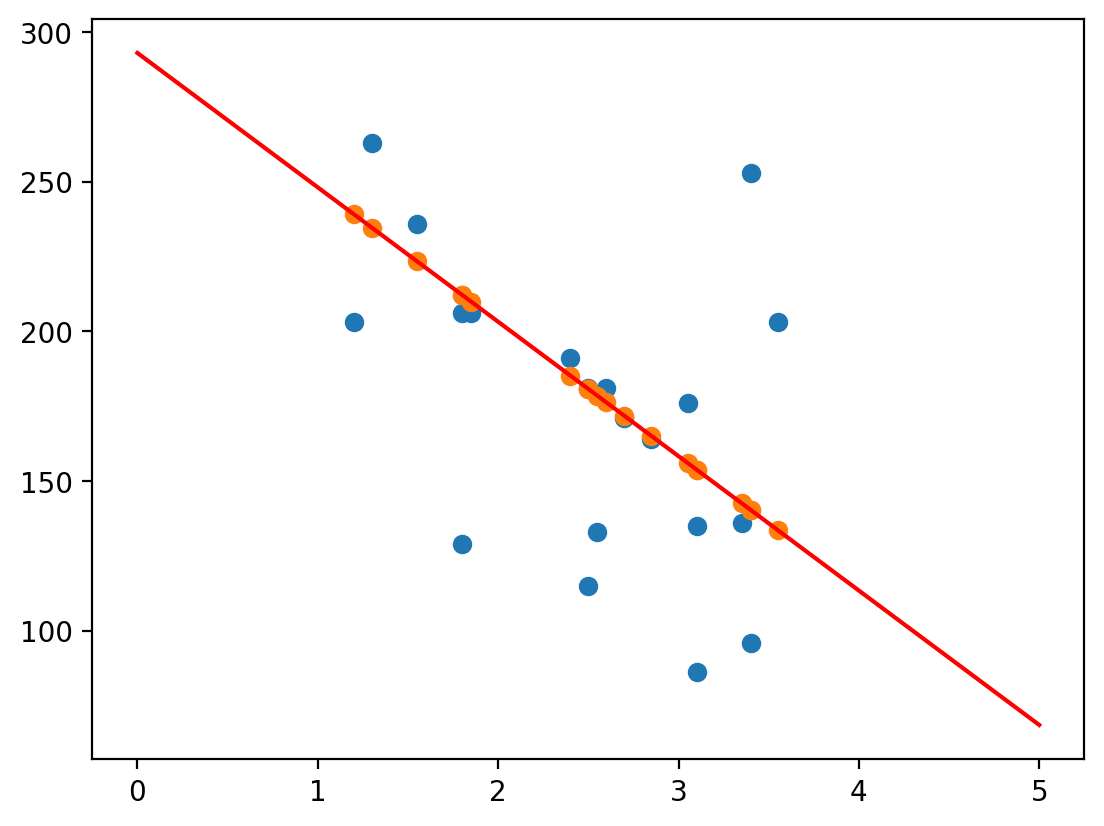

In [37]:
# 모델 일차함수 그리기
x = np.linspace(0, 5, 6)
y = model(x, w, b)
plt.plot(y, c="r")

# 실제 데이터 값
plt.scatter(test['used_years'], test['price'])

# 모델이 예측한 값
plt.scatter(test['used_years'], test['prediction'])
plt.show()

### 다른 예제 Tips

In [38]:
import seaborn as sns

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [39]:
tips = sns.load_dataset("tips")
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [40]:
import pandas as pd
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,False,True,False,True,False,False,False,True,False,True
1,10.34,1.66,3,True,False,False,True,False,False,False,True,False,True
2,21.01,3.50,3,True,False,False,True,False,False,False,True,False,True
3,23.68,3.31,2,True,False,False,True,False,False,False,True,False,True
4,24.59,3.61,4,False,True,False,True,False,False,False,True,False,True


이 코드는 범주형(문자열) 데이터를 컴퓨터가 이해할 수 있는 숫자 형태로 바꾸는 **원-핫 인코딩(One-Hot Encoding)** 을 수행하는 코드입니다.

In [41]:
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
tips.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,tip
0,16.99,2,False,True,False,True,False,False,False,True,False,True,1.01
1,10.34,3,True,False,False,True,False,False,False,True,False,True,1.66
2,21.01,3,True,False,False,True,False,False,False,True,False,True,3.50
3,23.68,2,True,False,False,True,False,False,False,True,False,True,3.31
4,24.59,4,False,True,False,True,False,False,False,True,False,True,3.61


### 📊 다중 선형 회귀(Multiple Linear Regression) 모델 공식

변수가 여러 개인 경우, 각 변수에 대응하는 가중치($w$)가 붙어 다음과 같은 방정식이 만들어집니다. 팁(`tip`) 예측 모델의 경우, 인코딩된 각 컬럼이 $x_1, x_2, \dots$ 가 됩니다.

$$y = w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 + w_5x_5 + w_6x_6 + w_7x_7 + w_8x_8 + w_9x_9 + w_{10}x_{10} + w_{11}x_{11} + w_{12}x_{12} + b$$

---

#### 💡 각 기호의 의미
* **$y$**: 예측값 (예: `tip` 금액)
* **$x_1, \dots, x_{12}$**: 입력 데이터의 각 컬럼 (예: `total_bill`, `size`, `sex_Male`, `day_Sun` 등)
* **$w_1, \dots, w_{12}$**: 각 컬럼이 결과에 미치는 영향력을 나타내는 **가중치(Weights)**
* **$b$**: 모든 조건이 0일 때의 기본값인 **편향(Bias)**

In [42]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values
print("슝=3")

슝=3


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(195, 12) (195,)
(49, 12) (49,)


In [44]:
# 길이가 12인 W와 1개의 숫자인 b를 준비
import numpy as np
W = np.random.rand(12)
b = np.random.rand()
print("슝=3")

슝=3


In [45]:
W

array([0.03665361, 0.85170674, 0.87413599, 0.45734191, 0.72627738,
       0.18252806, 0.82522001, 0.96311836, 0.26393049, 0.55333678,
       0.83983008, 0.42909888])

In [46]:
b

0.41643743182356907

In [47]:
def model(X, W, b):
    predictions = 0
    for i in range(12):
        predictions += X[:, i] * W[i] # X[:, i]: X[:, i]는 데이터에서 $i$번째 컬럼(특징) 전체를 가져온다..
    predictions += b
    return predictions
print("슝=3")

슝=3


In [48]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse
print("슝=3")

슝=3


In [49]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L
print("슝=3")

슝=3


In [50]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)

    # y_pred 준비
    y_pred = model(X, W, b)

    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)

    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return np.array(dW, dtype=np.float64), db
print("슝=3")

슝=3


In [51]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [98.11602799 13.58072905  3.38472845  1.69927153  2.08988669  2.99411328
  1.53995801  0.45716571  1.56499332  1.52188293  1.71508146  3.36891851]
db: 5.083999975167796


In [52]:
LEARNING_RATE = 0.0001

In [53]:
%%time
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 3.4287
Iteration 20 : Loss 2.8950
Iteration 30 : Loss 2.8233
Iteration 40 : Loss 2.8092
Iteration 50 : Loss 2.8024
Iteration 60 : Loss 2.7964
Iteration 70 : Loss 2.7906
Iteration 80 : Loss 2.7848
Iteration 90 : Loss 2.7791
Iteration 100 : Loss 2.7734
Iteration 110 : Loss 2.7677
Iteration 120 : Loss 2.7620
Iteration 130 : Loss 2.7563
Iteration 140 : Loss 2.7507
Iteration 150 : Loss 2.7451
Iteration 160 : Loss 2.7395
Iteration 170 : Loss 2.7339
Iteration 180 : Loss 2.7284
Iteration 190 : Loss 2.7229
Iteration 200 : Loss 2.7174
Iteration 210 : Loss 2.7119
Iteration 220 : Loss 2.7064
Iteration 230 : Loss 2.7010
Iteration 240 : Loss 2.6956
Iteration 250 : Loss 2.6902
Iteration 260 : Loss 2.6848
Iteration 270 : Loss 2.6795
Iteration 280 : Loss 2.6742
Iteration 290 : Loss 2.6689
Iteration 300 : Loss 2.6636
Iteration 310 : Loss 2.6583
Iteration 320 : Loss 2.6531
Iteration 330 : Loss 2.6479
Iteration 340 : Loss 2.6427
Iteration 350 : Loss 2.6375
Iteration 360 : Loss 2.6323
I

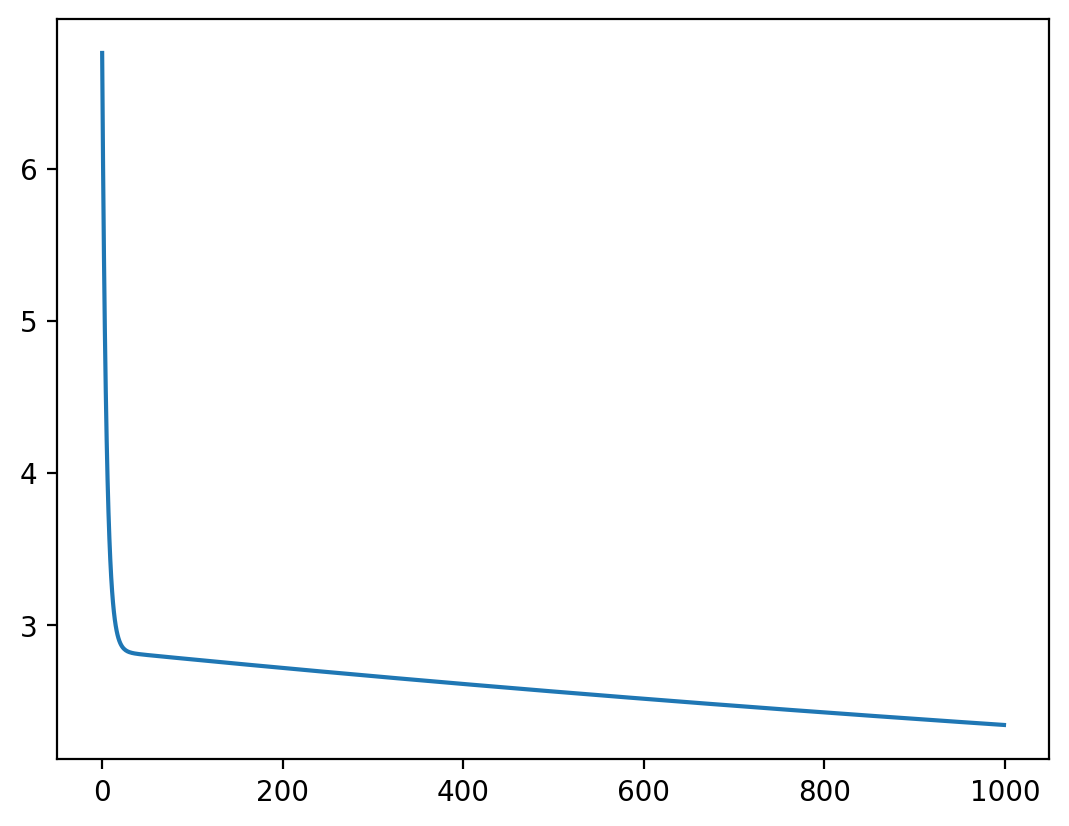

In [54]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [55]:
W, b

(array([-0.03362191,  0.679255  ,  0.81862698,  0.42576286,  0.67785206,
         0.14386532,  0.77119101,  0.94339561,  0.26173681,  0.54219416,
         0.77195826,  0.40988265]),
 np.float64(0.3293493731742194))

In [56]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

np.float64(2.0512419698379367)

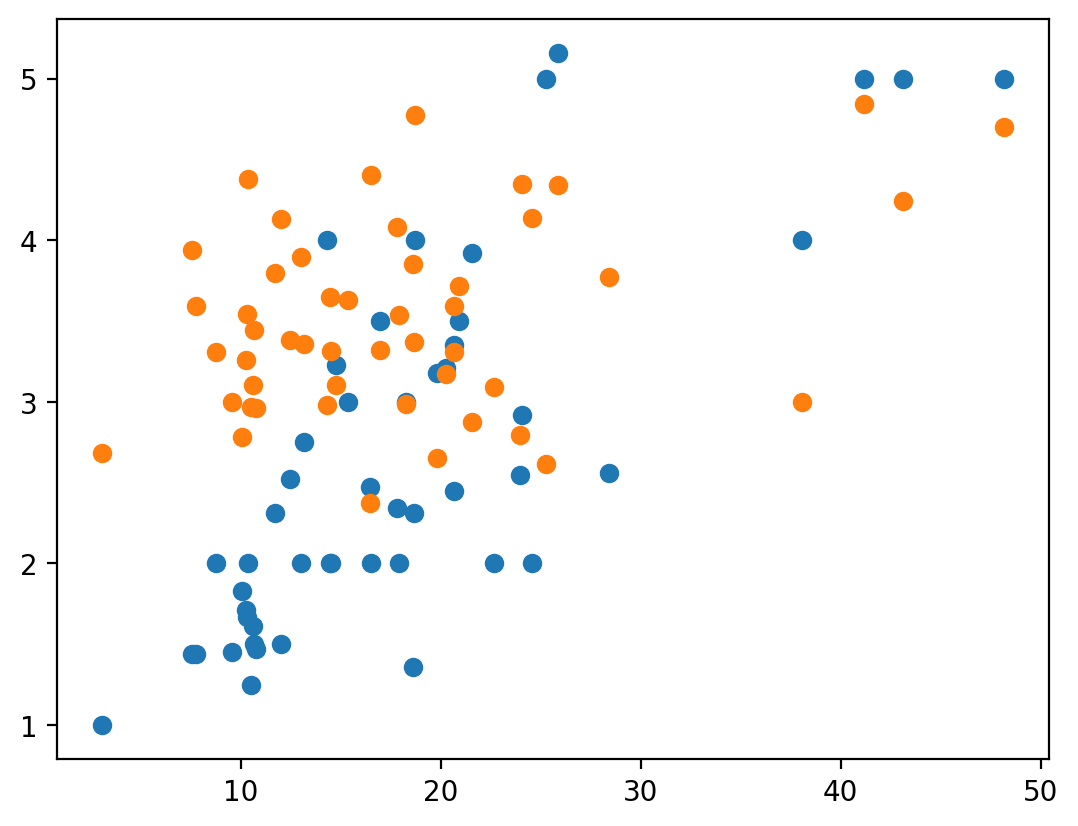

In [57]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

### 지금까지 한 모든 과정을, 라이브러리로 깔끔하게

In [58]:
tips = sns.load_dataset("tips")
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
print("슝=3")

슝=3


In [59]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values
print("슝=3")

슝=3


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("슝=3")

슝=3


In [63]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
print("슝=3")

슝=3


In [64]:
%%time
model.fit(X_train, y_train)

CPU times: user 3.09 ms, sys: 0 ns, total: 3.09 ms
Wall time: 3.22 ms


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [65]:
predictions = model.predict(X_test)
predictions

array([2.91436632, 2.00292613, 3.96425583, 3.76380832, 2.14836306,
       2.67423448, 3.63934628, 2.29147245, 2.57207155, 2.45851225,
       2.90446763, 2.0573337 , 2.11817193, 2.35130838, 1.82976215,
       3.10830675, 2.95140176, 3.21602976, 2.56640892, 5.73957295,
       3.43490366, 3.22645102, 2.17139823, 1.94180002, 3.16394533,
       2.24547894, 2.14497574, 3.21025435, 3.20097595, 6.66803147,
       5.01111235, 1.57804024, 3.1909877 , 2.76652194, 2.98412862,
       3.85695724, 2.17008741, 5.46673999, 2.35586827, 2.99190732,
       2.03271177, 2.48465991, 3.44046814, 2.35532237, 1.92528104,
       0.87348926, 1.81911521, 3.04083954, 1.85436902])

In [66]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

0.7033566017436103

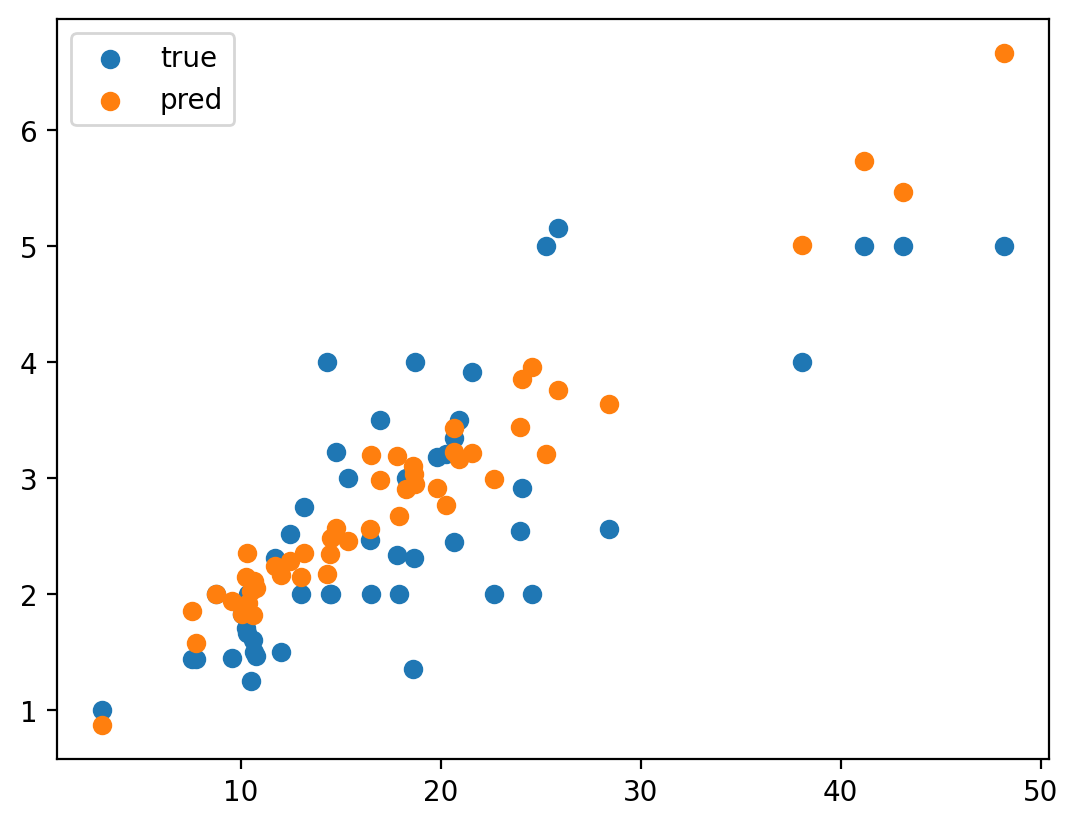

In [67]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()